# Implémentation de l'architecture des réseaux de neurones

*http://exo7.emath.fr/cours/livre-deepmath.pdf* 

## Chargement des modules et données

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

In [2]:
df = pd.read_csv('market_data_pd_clean.csv')
#dataset des 5.000 premiers bonds récupérés de bloom

In [3]:
df.head()

,Unnamed: 0,Reference Security,Ticker_x,Bid Price,Ask Price,Mid Price,Issuer Name,Cpn,Maturity,Ticker_y,...,Debt/Assets,Debt/EBITDA,EBITDA,Int Exp / Avg Int Bear Liab,Tot Debt / Tot Capital,Tot Loans to Tot Assets,Tot Risk-Based Cap,Earnings Assets / Int Bear Liab,Total Expenses to Average Earning Assets,PD_1y
0,0,AU053739 Corp,AABHFH,100.086,100.098,100.0920,Alandsbanken Abp,0.50,09/13/2021,AABHFH,...,33.1593,NaN,NaN,NaN,87.2526,72.7382,275.5,NaN,NaN,0.995909
1,1,BP432479 Corp,AAFFP,101.450,102.108,101.7790,Afflelou SAS,4.25,05/19/2026,AAFFP,...,60.3164,1.61252,70.221,NaN,77.8533,NaN,NaN,NaN,NaN,0.135456
2,2,BP486833 Corp,AAFFP,101.375,102.375,101.8750,Afflelou SAS,8.00,05/19/2027,AAFFP,...,60.3164,1.61252,70.221,NaN,77.8533,NaN,NaN,NaN,NaN,0.113669
3,3,EJ102177 Corp,AALLN,102.360,102.801,102.5805,Anglo American Capital PLC,3.50,03/28/2022,AALLN,...,79.0061,NaN,NaN,3.78296,80.4119,NaN,NaN,NaN,NaN,0.636872
4,4,EK150567 Corp,AALLN,105.728,105.887,105.8075,Anglo American Capital PLC,3.25,04/03/2023,AALLN,...,79.0061,NaN,NaN,3.78296,80.4119,NaN,NaN,NaN,NaN,0.319589


In [4]:
df.shape

(603, 23)

In [5]:
#RECUPERER VRAIES DONNEES DE PROBA DE DEFAUT ARGGGHHHHHHHHHHHHHHHHHHHHHHHHH
#à partir du premier algo, estimer PD? données à récupérer, notamment le PRIXXXX 

#j'ai mis des valeurs aléatoires pour créer la colonne

#df["PD"] = pd.Series(np.random.random(len(df["ISIN"])), index=df.index)

In [6]:
#mettre les ratios financiers
df1 = df[["Debt / Common Equity", "Debt/Assets", "Tot Debt / Tot Capital","PD_1y"]]

#df1.replace(np.nan, 0.0,inplace=True)

In [7]:
df1 = df1.dropna(how = 'any') 
df1.head()
#on peut pas faire tourner l'algo avec des valeurs manquantes. Voir techniques pour les remplacer.

,Debt / Common Equity,Debt/Assets,Tot Debt / Tot Capital,PD_1y
0,684.499,33.1593,87.2526,0.995909
1,351.535,60.3164,77.8533,0.135456
2,351.535,60.3164,77.8533,0.113669
3,410.513,79.0061,80.4119,0.636872
4,410.513,79.0061,80.4119,0.319589


In [8]:
df1.shape

(541, 4)

## Traitement des données 

In [9]:
#Préparation bases de train et de test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.drop("PD_1y",axis=1),df1["PD_1y"],test_size=0.2, random_state=42) 

In [10]:
#Standardisation des données 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(X_train)

x_train = scaler.transform(X_train)
x_train = pd.DataFrame(x_train, index=X_train.index, columns=X_train.columns)

x_test = scaler.transform(X_test)
x_test = pd.DataFrame(x_test, index=X_test.index, columns=X_test.columns)

In [11]:
x_test.head()

,Debt / Common Equity,Debt/Assets,Tot Debt / Tot Capital
258,-0.124417,-1.569320,-1.561454
75,-0.079178,-0.424929,1.104960
399,-0.124775,-1.635033,-1.730703
88,-0.079178,-0.424929,1.104960
527,-0.101769,-0.216428,0.865320


## Réseaux de neurones 

In [12]:
#RESEAUX DE NEURONES 
#http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Packages_Python_for_Deep_Learning.pdf

In [13]:
#Explications très bien dans ce document : 

#http://exo7.emath.fr/cours/livre-deepmath.pdf 

#très bon document (parties Python, keras avec les codes et explications)

In [55]:
modele = Sequential()
modele.add(Dense(units=7,input_dim=3,activation="sigmoid")) #6 is good
modele.add(Dense(units=1,activation="sigmoid"))
#modele.add(Dropout(0.3))
learning_rate = 0.10

sgd = SGD(learning_rate)

J'ai pris la fonction sigmoïde car elle est continue et à valeurs dans [0,1] (comme les probabilités de défaut). Régression logit. 

In [56]:
modele.compile(loss='mean_squared_error',optimizer=sgd,metrics=[tf.keras.metrics.MeanSquaredError()])

In [57]:
print(modele.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 7)                 28        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 8         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/9
15/15 [==============================] - 0s 7ms/step - loss: 0.1754 - mean_squared_error: 0.1754 - val_loss: 0.1047 - val_mean_squared_error: 0.1047
Epoch 2/9
15/15 [==============================] - 0s 2ms/step - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0564 - val_mean_squared_error: 0.0564
Epoch 3/9
15/15 [==============================] - 0s 2ms/step - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 4/9
15/15 [==============================] - 0s 2ms/step - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 5/9
15/15 [==============================] - 0s 2ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 6/9
15/15 [==============================] - 0s 2ms/step - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 7/9
15/15 [=============================

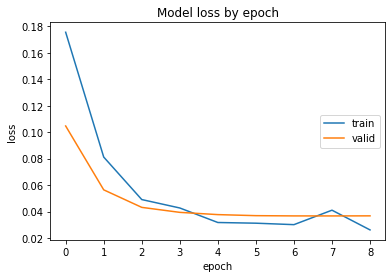

In [58]:
history = modele.fit(x_train, y_train,         # Train the model using the training set...
          batch_size=10, epochs=9,
          verbose=1, validation_split=0.35,steps_per_epoch=15)           # ...holding out 40% of the data for validation

# --------------------------------------
# Evaluation
# --------------------------------------
for loss_name, loss_value in list(zip(modele.metrics_names, modele.evaluate(x_test, y_test, verbose=1))):
    print('The final {} on the TEST set is: {:.2f}.'.format(loss_name, loss_value)) # Evaluate the trained model on the test set!

    
import matplotlib.pyplot as plt

# --------------------------------------
# Loss functions evolution
# --------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='right')
plt.show()

In [59]:
#Résultats 

resultat = modele.evaluate(x_test, y_test, verbose=1)
print("Valeur de l'erreur sur les données de test (loss):", resultat[0])
print('Précision sur les données de test (MSE):', resultat[1])

4/4 [==============================] - 0s 577us/step - loss: 0.0312 - mean_squared_error: 0.0312
Valeur de l'erreur sur les données de test (loss): 0.031191790476441383
Précision sur les données de test (MSE): 0.031191790476441383


In [82]:
df2 = df1.sort_values('PD_1y')

In [96]:
for idx, row in df2.iterrows():
    print('+==========')
    print(row)

+==========
Debt / Common Equity      4.343560e+02
Debt/Assets               2.628410e+01
Tot Debt / Tot Capital    7.945930e+01
PD_1y                     7.450581e-09
Name: 587, dtype: float64
+==========
Debt / Common Equity      0.000000e+00
Debt/Assets               0.000000e+00
Tot Debt / Tot Capital    0.000000e+00
PD_1y                     7.450581e-09
Name: 234, dtype: float64
+==========
Debt / Common Equity      48.288000
Debt/Assets                1.843050
Tot Debt / Tot Capital    32.435700
PD_1y                      0.015045
Name: 106, dtype: float64
+==========
Debt / Common Equity      43.05550
Debt/Assets                2.37374
Tot Debt / Tot Capital    28.90940
PD_1y                      0.01529
Name: 400, dtype: float64
+==========
Debt / Common Equity      36.374200
Debt/Assets                2.947590
Tot Debt / Tot Capital    23.741600
PD_1y                      0.016466
Name: 451, dtype: float64
+==========
Debt / Common Equity      144.896000
Debt/Assets          

Name: 504, dtype: float64
+==========
Debt / Common Equity      187.144000
Debt/Assets                37.753200
Tot Debt / Tot Capital     65.174300
PD_1y                       0.235446
Name: 8, dtype: float64
+==========
Debt / Common Equity      379.882000
Debt/Assets                46.426100
Tot Debt / Tot Capital     79.005500
PD_1y                       0.238657
Name: 503, dtype: float64
+==========
Debt / Common Equity      426.929000
Debt/Assets                70.866100
Tot Debt / Tot Capital     80.908200
PD_1y                       0.239543
Name: 229, dtype: float64
+==========
Debt / Common Equity      650.789000
Debt/Assets                31.257800
Tot Debt / Tot Capital     85.490000
PD_1y                       0.239969
Name: 57, dtype: float64
+==========
Debt / Common Equity      650.789000
Debt/Assets                31.257800
Tot Debt / Tot Capital     85.490000
PD_1y                       0.240107
Name: 58, dtype: float64
+==========
Debt / Common Equity      322.051000

In [65]:
arr = np.array([410.513,79.0061,80.4119]).reshape(-1,1) #ligne 1 et 2
scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(arr)

x = scaler.transform(arr)

In [78]:
x = np.array([-0.079178,-0.424929,1.104960]).reshape(-1,1)

In [80]:
modele.predict(x.T)

array([[0.18508047]], dtype=float32)

In [68]:
y_test.head()

258    0.018366
75     0.351885
399    0.024631
88     0.128857
527    0.676359
Name: PD_1y, dtype: float64

In [67]:
x_test.head()

,Debt / Common Equity,Debt/Assets,Tot Debt / Tot Capital
258,-0.124417,-1.569320,-1.561454
75,-0.079178,-0.424929,1.104960
399,-0.124775,-1.635033,-1.730703
88,-0.079178,-0.424929,1.104960
527,-0.101769,-0.216428,0.865320
